In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all = pd.read_csv('../datasets/all.csv')

### check for duplicates

In [3]:
all.duplicated().sum()

31

### dist of bechdel score

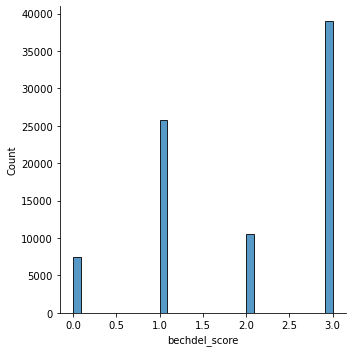

In [5]:
sns.displot(all, x=all['bechdel_score'])

### check layout of genres

In [4]:
all.iloc[0].genres

'Adventure|Animation|Children|Comedy|Fantasy'

### dummy genres for viz

In [6]:
dummies = all['genres'].str.get_dummies(sep='|')
final = pd.concat([all, dummies], axis=1)

In [7]:
final.head()

,title,genres,imdbId,userId,rating,bechdel_score,year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,1,4.0,1,1995.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,5,4.0,1,1995.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,7,4.5,1,1995.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,15,2.5,1,1995.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,17,4.5,1,1995.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### check for null

In [8]:
all.isna().sum()

title            0
genres           0
imdbId           0
userId           0
rating           0
bechdel_score    0
year             7
dtype: int64

### fill null

In [9]:
all['year'].fillna(0, inplace=True)

In [10]:
all.isna().sum()

title            0
genres           0
imdbId           0
userId           0
rating           0
bechdel_score    0
year             0
dtype: int64

### save dummied genres to separate csv to avoid issues with models

In [11]:
final.to_csv('../datasets/all_genres.csv', index=False)